# Régression

* Modéliser des relations statistiques entre deux variables

* Estimer l'impact de la variation d'une variable explicative sur une variable à expliquer

* Modèle : $y = f(x) + \epsilon$, où $x$ est une variable explicative (entrée), $y$ est une réponse (sortie) et $\epsilon$ un terme d'erreur.

Aide sur Markdown: https://colab.research.google.com/notebooks/markdown_guide.ipynb

# Partie I : Données simulées

## I.1. Régression linéaire

* $f(x) = \langle x, \beta \rangle$

* estimer le vecteur de paramètre $\beta$

a) Générer $n$ données suivant le modèle : $y_i = \beta_0 + \beta_1 x_i + \epsilon_i, i=1,\ldots,n$, avec $n=100$ et des valeurs arbitraires pour $\beta_0$ et $\beta_1$. Afficher les données.

Beta: [0.34430405 0.96369855]


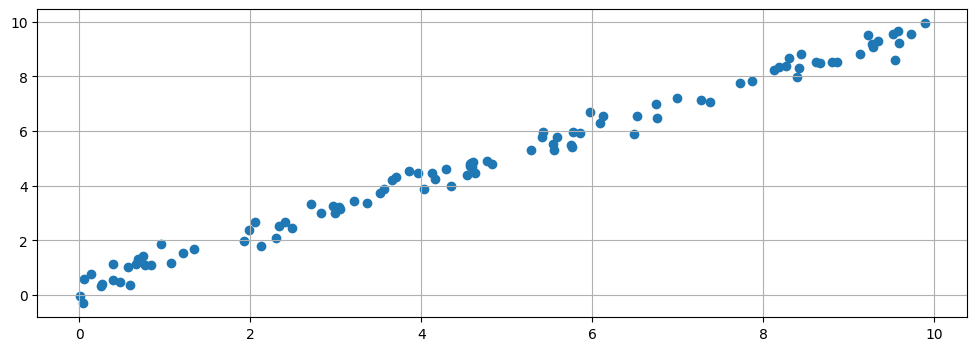

In [40]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


beta_ref = np.random.rand(2)
print('Beta:', beta_ref)

n_examples = 100
sigma = 0.3
x = np.random.rand(n_examples) * 10
y = x * beta_ref[1] + beta_ref[0] + np.random.randn(n_examples) * sigma
plt.figure(figsize=(12,4))
plt.scatter(x, y)
plt.grid()

b) Calculer la solution obtenue par une régression linéaire à moindres carrés. Tracer la droite de régression obtenue.

Beta: [0.34430405 0.96369855]
Beta estimé: [0.34465998 0.95234059]
Erreur sur Beta: [ 0.00035592 -0.01135796]


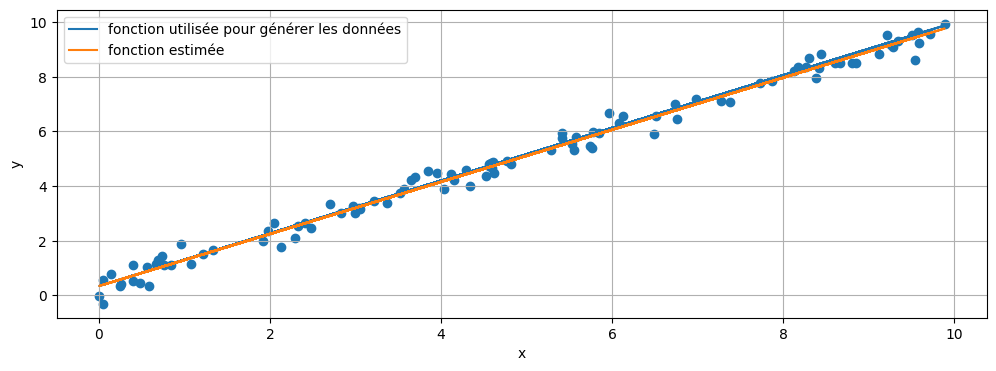

In [41]:
x_moy = np.mean(x)
y_moy = np.mean(y)
beta_est = np.empty(2)
beta_est[1] = np.sum((x - x_moy) * (y - y_moy)) / np.sum((x - x_moy) ** 2)
beta_est[0] = y_moy - beta_est[1] * x_moy
print('Beta:', beta_ref)
print('Beta estimé:', beta_est)
print('Erreur sur Beta:', beta_est - beta_ref)

plt.figure(figsize=(12, 4))
plt.scatter(x, y)
plt.plot(x, beta_ref[0] + beta_ref[1] * x, label='fonction utilisée pour générer les données')
plt.plot(x, beta_est[0] + beta_est[1] * x, label='fonction estimée')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## I.2. Régression non linéaire


a) Générer des données suivant le modèle : $y_i = \sin(\frac{x_i}{10}) +(\frac{x_i}{50})^2 + \epsilon $, avec $x_i = i, \forall i =1,\ldots,100$. Afficher les données.

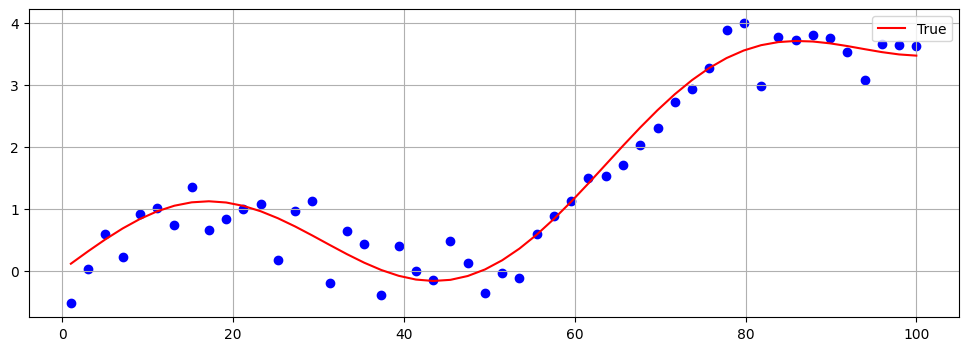

In [69]:
sigma = 0.3  # écart-type du bruit
beta_ref = np.random.rand(2)

X = np.linspace(1, 100, 50)
y_ref = np.sin(X/10) + (X/50) ** 2 + 0.01

plt.figure(figsize=(12,4))
noise = np.random.normal(0, sigma, size=y_ref.shape)
y = y_ref + noise
plt.scatter(X, y, c="blue")
plt.plot(X, y_ref, label='True', c="red")
plt.legend()
plt.grid()


### I.2.1. Régression polynomiale

* $y = \beta_0 + \beta_1 x + \beta_2 x^2 +\beta_3 x^3$

* La solution d'une régression linéaire : $\hat{\beta} = (X^\top X)^{-1} X^\top Y$

* Utiliser $X = [1 \ x \ x^2 \ x^3]$


a) Ecrire une fonction qui retourne la solution de la régression linéaire multiple.

In [70]:
def learn_regression_poly3(X, y):
    X_poly = np.hstack((np.ones(X.shape), X, X**2, X**3))
    return np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T @ y


b) Utilisant la fonction ci-dessus, estimer les paramètres du modèle de régression polynomiale et afficher la solution.

In [71]:
def predict_regression_poly3(X, beta):
    X_poly = np.hstack((np.ones(X.shape), X, X**2, X**3))
    return X_poly @ beta

In [74]:
pred = predict_regression_poly3(X, beta_est)

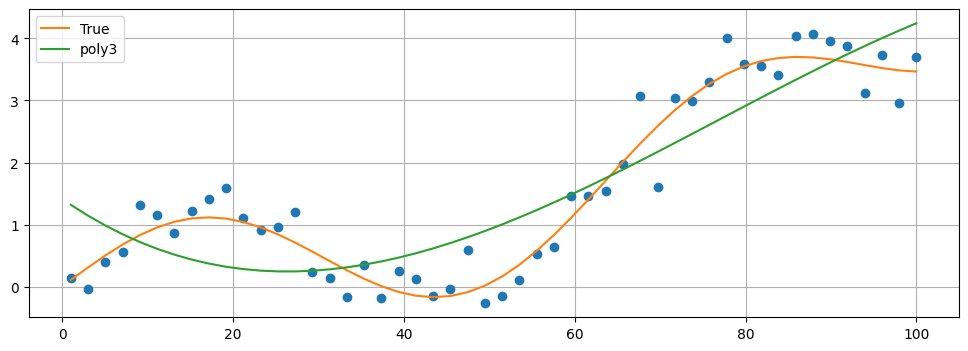

In [75]:
X = np.linspace(1, 100, 50).reshape(-1, 1)
y_ref = np.sin(X / 10) + (X / 50) ** 2 + 0.01
noise = np.random.normal(0, sigma, size=y_ref.shape)
y = y_ref + noise

beta_est = learn_regression_poly3(X, y)
pred = predict_regression_poly3(X, beta_est)

plt.figure(figsize=(12,4))
plt.plot(X, y, 'o')
plt.plot(X, y_ref, label='True')
plt.plot(X, pred, label='poly3')
plt.legend()
plt.grid()



# Partie II : Données réelles

## II.1. Récupérer et préparer les données

### II.1.1. Récupération

Vous allez travailler sur les données suivantes : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#, et en particulier sur le fichier day.csv de ce jeu de données.



- Si vous utilisez jupyter notebook sur votre ordinateur, le jeu de données peut être chargé en utilisant la commande suivante :  `data = pd.read_csv('day.csv')` ou `data = pd.read_csv('Bike-Sharing-Dataset/day.csv')` suivant où se trouve le fichier.

- Si vous travaillez sur google colab vous devrez uploader le fichier day.csv sur votre drive et lier l'execution de votre colab notebook avec votre drive pour pouvoir ensuite y accéder comme ci dessus.

Pour lier l'execution de votre colab notebook avec votre drive il suffit d'exécuter au début de votre notebook les instructions :

```
from google.colab import drive
drive.mount('/content/drive')
```
Une fois ces instructions exécutées votre drive est accessible depuis votre notebook et vous pouvez lire ou sauvegarder dans un fichier de votre drive à partir du notebook, par exemple avec:

```
pd.read_csv(...)
```
Il vous faut cependant bien spécifier le chemin vers le fichier.





### II.1.2. Préparation

Pour préparer les données, vous éliminerez les colonnes 'instant', 'dteday', 'casual', 'registered' des données et constituerez les données d'entrée et de sortie afin de prédire la colonne 'cnt' à partir des colonnes restantes.

In [87]:
import pandas as pd

In [88]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [92]:
data.shape, target.shape

((506, 13), (506,))

## II.2. Régression Ridge et Lasso

La régression ridge et lasso sont des extensions de la régression linéaire par moindres carrés permettant d'éviter le risque de sur-apprendtissage. L'idée est d'ajouter une pénalisation au problème de régression par moindres carrés:
$$ \arg\min_{w\in\mathbb{R}^d, b\in\mathbb{R}} \sum_{i=1}^n \big(y_i - \langle w, x_i \rangle-b\big)^2 + \lambda \Omega(w),$$
où $\lambda\in\mathbb{R}$ est un paramètre de régularisation, $\Omega(w) = \|w\|_2^2$ pour la régression ridge et $\Omega(w) = \|w\|_1$ pour le Lasso.

a) Utilisant la bibliothèque Scikit-learn, appliquez la régression Ridge et la régression Lasso sur le jeu de données "Bike Sharing". Affichez et comparez les deux solutions obtenues.

In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings("ignore")

In [116]:
regularisation = range(1, 100)
lasso_score = []
for l in regularisation:
    X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                        random_state=123,
                                                        test_size=0.3,
                                                        shuffle=True)
    model = Ridge(alpha=l)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    lasso_score.append(mean_squared_error(y_pred, y_test))

In [117]:
regularisation = range(1, 100)
ridge_score = []
for l in regularisation:
    X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                        random_state=123,
                                                        test_size=0.3,
                                                        shuffle=True)
    model = Lasso(alpha=l)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ridge_score.append(mean_squared_error(y_pred, y_test))

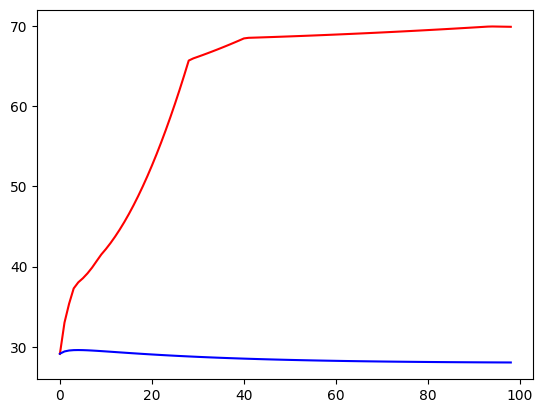

In [118]:
plt.plot(ridge_score, c="red")
plt.plot(lasso_score, c="blue")

b) Calculez les erreurs de prédiction sur les données d'apprentissage obtenues avec les régressions Ridge et Lasso (utiliser la valeur par défaut de Scikit-learn pour le paramètre de régularisation). Comparez les résultats avec ceux obtenus par la régression par moindre carrés.

In [147]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

lasso_score = []
ridge_score = []
lr_score = []

kf = KFold(n_splits=5, shuffle=True, random_state=123)

for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.3,
                                                    shuffle=True)

    # Lasso model
    model = Lasso()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    lasso_score.append(mean_squared_error(y_pred, y_test))

    # Ridge model
    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ridge_score.append(mean_squared_error(y_pred, y_test))

    # Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    lr_score.append(mean_squared_error(y_pred, y_test))


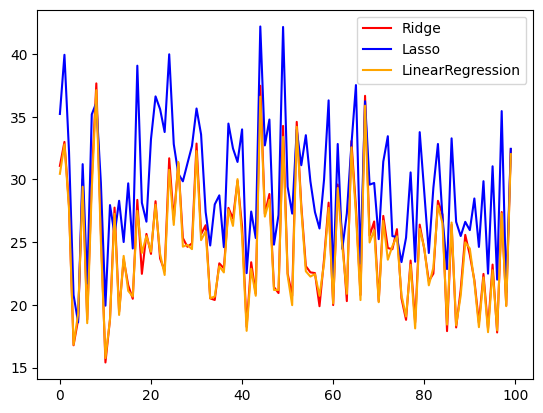

In [148]:
plt.plot(ridge_score, c="red", label="Ridge")
plt.plot(lasso_score, c="blue", label="Lasso")
plt.plot(lr_score, c="orange", label="LinearRegression")
plt.legend()

## II.2.3. Réglage des hyper paramètres par cross validation

Le choix du paramètre $\lambda$ est primordial pour avoir des résultats de prédiction optimaux. Une façon de procéder pour trouver une bonne valeur $\lambda$ est d'utiliser la méthode de cross-validation sur une grille de valeurs. Déterminer par cross-validation les valeurs de $\lambda$ permettant d'avoir les meilleurs taux de prédiction.

Vous tracerez les courbes de performance en validation (ordonnée) en fonction de $\lambda$ (abscisse) pour les modèles Ridge et Lasso.  



In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso

alpha_values = np.logspace(-4, 1, 50)

ridge_scores = []
lasso_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=123)

for alpha in alpha_values:
    # Modèle Ridge
    ridge = Ridge(alpha=alpha)
    ridge_cv_scores = -cross_val_score(ridge, data, target, cv=kf, scoring='neg_mean_squared_error')
    ridge_scores.append(np.mean(ridge_cv_scores))  # Moyenne des erreurs quadratiques moyennes pour chaque alpha

    # Modèle Lasso
    lasso = Lasso(alpha=alpha)
    lasso_cv_scores = -cross_val_score(lasso, data, target, cv=kf, scoring='neg_mean_squared_error')
    lasso_scores.append(np.mean(lasso_cv_scores))

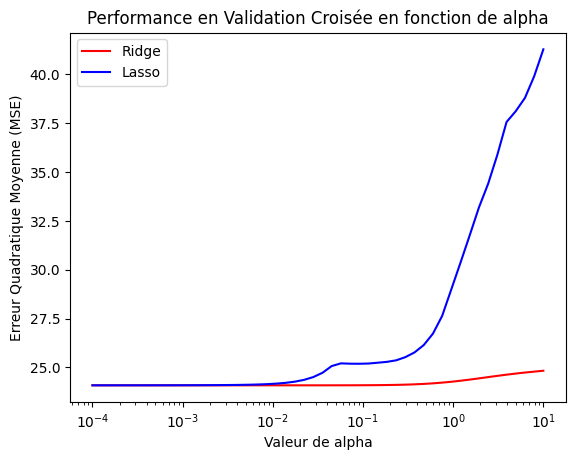

In [150]:
plt.plot(alpha_values, ridge_scores, label='Ridge', color='red')
plt.plot(alpha_values, lasso_scores, label='Lasso', color='blue')

plt.xscale('log')
plt.xlabel('Valeur de alpha')
plt.ylabel('Erreur Quadratique Moyenne (MSE)')
plt.title('Performance en Validation Croisée en fonction de alpha')
plt.legend()
plt.show()


## II.2.4. Analyse du modèle appris

- En examinant les poids du meilleur modèle dont vous disposez, déterminez quels sont les attributs les plus importants pour la tâche de prédiction. Plus le paramètre correspondant à une colonne est petit en valeur absolue moins la caractéristique correspondante est importante.

Quelles sont les caractéristiques ayant le plus de pouvoir prédictif dans ce problème de régression ?

- Reproduisez l'ensemble de l'expérience (apprentissage, choix du meilleur modèle et analyse des paramètres de ce modèle) en normalisant **avant toute chose** les données avec un standard scaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Les résultats sont-ils différents et pourquoi ?



In [ ]:
# A compléter